KLASIFIKASI CITRA HAMA PADA DAUN TANAMAN MANGGA
---
# Pretrain model yang digunakan :

1.   [Resnet-101](https://arxiv.org/abs/1512.03385)
2.   [DenseNet-201](https://arxiv.org/abs/1608.06993)

# Sumber Dataset :
Dataset hama daun mangga ini diambil dari penelitian sebelumnya yang dilakukan oleh Kusrini dan rekannya

Link download dataset : [download](https://data.mendeley.com/datasets/94jf97jzc8/1)

# Daftar Class :


1. Apoderus javanicus
2. Aulacaspis tubercularis
3. Ceroplastes rubens
4. Cisaberoptus kenyae
5. Dappula tertia
6. Dialeuropora decempuncta
7. Erosomyia sp
8. Icerya seychellarum
9. Ischnaspis longirostris
10. Mictis longicornis
11. Neomelicharia sparsa
12. Orthaga euadrusalis
13. Procontarinia matteiana
14. Procontarinia rubus
15. Valanga nigricornis
16. Normal





In [ ]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101, DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Mount Google Drive dan ekstrak dataset
from google.colab import drive
drive.mount('/content/drive')

import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Dataset/versi1.zip')
zip_file.extractall('/tmp/')

Mounted at /content/drive


In [ ]:
# Direktori dataset
train_dir = '/tmp/versi1/train'
val_dir = '/tmp/versi1/valid'
test_dir = '/tmp/versi1/test'

In [ ]:
# Praproses data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

Found 46500 images belonging to 16 classes.
Found 103 images belonging to 16 classes.
Found 97 images belonging to 16 classes.


### **Model Resnet-101**



In [ ]:
# Model ResNet101
base_model_resnet = ResNet101(weights='imagenet', include_top=False)
x_resnet = base_model_resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
predictions_resnet = Dense(16, activation='softmax')(x_resnet)
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
# Membekukan layer dari base model ResNet101
for layer in base_model_resnet.layers:
    layer.trainable = False

In [ ]:
# Kompilasi model ResNet101
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Setup callback untuk model ResNet101
early_stop_resnet = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
checkpoint_resnet = ModelCheckpoint('best_weights_resnet.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger_resnet = CSVLogger('training_log_resnet.csv')

In [ ]:
# Training model ResNet101
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    epochs=50,
    callbacks=[early_stop_resnet, checkpoint_resnet, csv_logger_resnet])

Epoch 1/50
1453/1453 [==============================] - ETA: 0s - loss: 2.4861 - accuracy: 0.1860
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_weights_resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1453/1453 [==============================] - 201s 132ms/step - loss: 2.4861 - accuracy: 0.1860 - val_loss: 2.4306 - val_accuracy: 0.2500
Epoch 2/50
1453/1453 [==============================] - ETA: 0s - loss: 2.3581 - accuracy: 0.2421
Epoch 2: val_accuracy improved from 0.25000 to 0.27083, saving model to best_weights_resnet.h5
1453/1453 [==============================] - 187s 129ms/step - loss: 2.3581 - accuracy: 0.2421 - val_loss: 2.3578 - val_accuracy: 0.2708
Epoch 3/50
1453/1453 [==============================] - ETA: 0s - loss: 2.2923 - accuracy: 0.2755
Epoch 3: val_accuracy did not improve from 0.27083
1453/1453 [==============================] - 193s 133ms/step - loss: 2.2923 - accuracy: 0.2755 - val_loss: 2.3107 - val_accuracy: 0.2188
Epoch 4/50
1453/1453 [==============================] - ETA: 0s - loss: 2.2462 - accuracy: 0.2970
Epoch 4: val_accuracy did not improve from 0.27083
1453/1453 [==============================] - 189s 130ms/step - loss: 2.2462 - accuracy: 0.2970 - v

In [ ]:
# Memuat bobot terbaik untuk evaluasi
model_resnet.load_weights('best_weights_resnet.h5')

97/97 [==============================] - 3s 12ms/step
Results for ResNet101:
Accuracy: 0.28865979381443296
Precision: 0.6331242108585858
Recall: 0.19510360962566844
F1 Score: 0.16340488215488216
Results for ResNet101 (%):
Accuracy: 28.87%
Precision: 63.31%
Recall: 19.51%
F1 Score: 16.34%


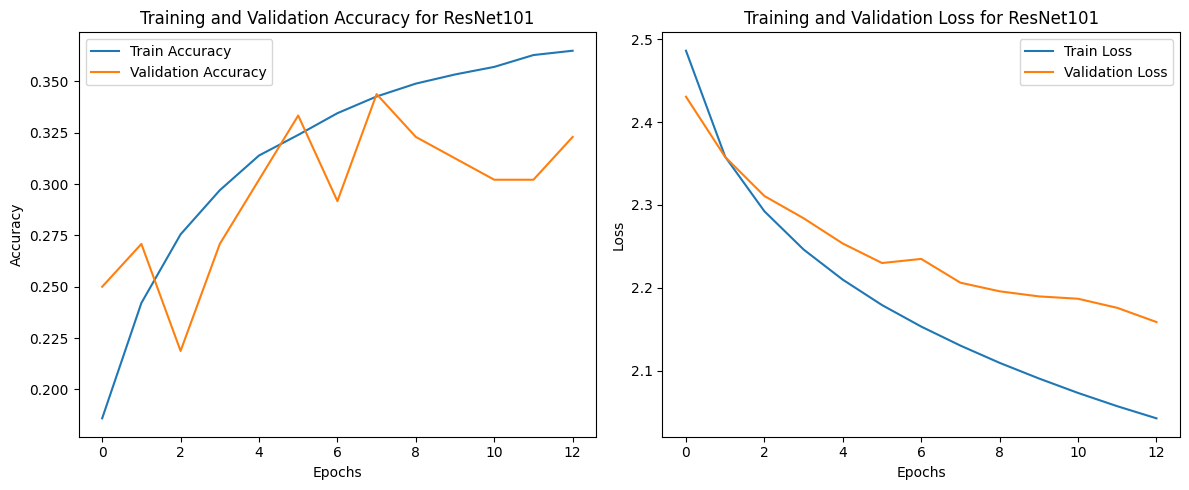

In [ ]:
# Evaluasi model ResNet101
y_true_resnet = test_generator.classes
y_pred_resnet = model_resnet.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)

accuracy_resnet = accuracy_score(y_true_resnet, y_pred_classes_resnet)
precision_resnet = precision_score(y_true_resnet, y_pred_classes_resnet, average='macro', zero_division=1)
recall_resnet = recall_score(y_true_resnet, y_pred_classes_resnet, average='macro')
f1_resnet = f1_score(y_true_resnet, y_pred_classes_resnet, average='macro')

print("Results for ResNet101:")
print(f"Accuracy: {accuracy_resnet}")
print(f"Precision: {precision_resnet}")
print(f"Recall: {recall_resnet}")
print(f"F1 Score: {f1_resnet}")

print("Results for ResNet101 (%):")
print(f"Accuracy: {accuracy_resnet * 100:.2f}%")
print(f"Precision: {precision_resnet * 100:.2f}%")
print(f"Recall: {recall_resnet * 100:.2f}%")
print(f"F1 Score: {f1_resnet * 100:.2f}%")


# Baca file log CSV untuk ResNet101
log_data_resnet = pd.read_csv('training_log_resnet.csv')

# Plot akurasi pelatihan dan validasi untuk ResNet101
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(log_data_resnet['accuracy'], label='Train Accuracy')
plt.plot(log_data_resnet['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for ResNet101')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi untuk ResNet101
plt.subplot(1, 2, 2)
plt.plot(log_data_resnet['loss'], label='Train Loss')
plt.plot(log_data_resnet['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for ResNet101')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Model DenseNet-201**

In [ ]:
# Model DenseNet201
base_model_densenet = DenseNet201(weights='imagenet', include_top=False)
x_densenet = base_model_densenet.output
x_densenet = GlobalAveragePooling2D()(x_densenet)
predictions_densenet = Dense(16, activation='softmax')(x_densenet)
model_densenet = Model(inputs=base_model_densenet.input, outputs=predictions_densenet)

74836368/74836368 [==============================] - 3s 0us/step


In [ ]:
# Membekukan layer dari base model DenseNet201
for layer in base_model_densenet.layers:
    layer.trainable = False

In [ ]:
# Kompilasi model DenseNet201
model_densenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Setup callback untuk model DenseNet201
early_stop_densenet = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
checkpoint_densenet = ModelCheckpoint('best_weights_densenet.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger_densenet = CSVLogger('training_log_densenet.csv')

In [ ]:
# Training model DenseNet201
history_densenet = model_densenet.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    epochs=50,
    callbacks=[early_stop_densenet, checkpoint_densenet, csv_logger_densenet])

Epoch 1/50
1453/1453 [==============================] - ETA: 0s - loss: 1.4873 - accuracy: 0.5980
Epoch 1: val_accuracy improved from -inf to 0.67708, saving model to best_weights_densenet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1453/1453 [==============================] - 210s 136ms/step - loss: 1.4873 - accuracy: 0.5980 - val_loss: 1.0946 - val_accuracy: 0.6771
Epoch 2/50
1453/1453 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.8278
Epoch 2: val_accuracy improved from 0.67708 to 0.69792, saving model to best_weights_densenet.h5
1453/1453 [==============================] - 190s 131ms/step - loss: 0.7211 - accuracy: 0.8278 - val_loss: 0.9472 - val_accuracy: 0.6979
Epoch 3/50
1453/1453 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.8763
Epoch 3: val_accuracy improved from 0.69792 to 0.71875, saving model to best_weights_densenet.h5
1453/1453 [==============================] - 190s 131ms/step - loss: 0.5180 - accuracy: 0.8763 - val_loss: 0.8692 - val_accuracy: 0.7188
Epoch 4/50
1453/1453 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.9030
Epoch 4: val_accuracy did not improve from 0.71875
1453/1453 [==============================] - 192s 

In [ ]:
# Memuat bobot terbaik untuk evaluasi DenseNet201
model_densenet.load_weights('best_weights_densenet.h5')

97/97 [==============================] - 2s 22ms/step

Results for DenseNet201:
Accuracy: 0.7938144329896907
Precision: 0.8156140734265733
Recall: 0.8054414947797301
F1 Score: 0.7983925796425797

Results for DenseNet201 (%):
Accuracy: 79.38%
Precision: 81.56%
Recall: 80.54%
F1 Score: 79.84%


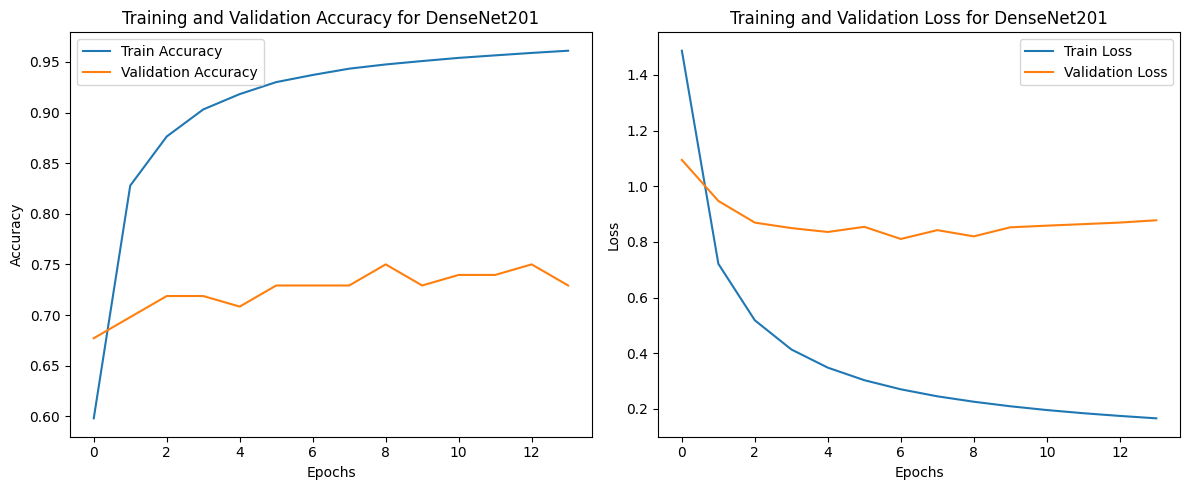

In [ ]:
# Evaluasi model DenseNet201
y_true_densenet = test_generator.classes
y_pred_densenet = model_densenet.predict(test_generator)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)

accuracy_densenet = accuracy_score(y_true_densenet, y_pred_classes_densenet)
precision_densenet = precision_score(y_true_densenet, y_pred_classes_densenet, average='macro', zero_division=1)
recall_densenet = recall_score(y_true_densenet, y_pred_classes_densenet, average='macro')
f1_densenet = f1_score(y_true_densenet, y_pred_classes_densenet, average='macro')

print("\nResults for DenseNet201:")
print(f"Accuracy: {accuracy_densenet}")
print(f"Precision: {precision_densenet}")
print(f"Recall: {recall_densenet}")
print(f"F1 Score: {f1_densenet}")

print("\nResults for DenseNet201 (%):")
print(f"Accuracy: {accuracy_densenet * 100:.2f}%")
print(f"Precision: {precision_densenet * 100:.2f}%")
print(f"Recall: {recall_densenet * 100:.2f}%")
print(f"F1 Score: {f1_densenet * 100:.2f}%")

# Baca file log CSV untuk DenseNet201
log_data_densenet = pd.read_csv('training_log_densenet.csv')

# Plot akurasi pelatihan dan validasi untuk DenseNet201
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(log_data_densenet['accuracy'], label='Train Accuracy')
plt.plot(log_data_densenet['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for DenseNet201')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi untuk DenseNet201
plt.subplot(1, 2, 2)
plt.plot(log_data_densenet['loss'], label='Train Loss')
plt.plot(log_data_densenet['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for DenseNet201')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()